In [53]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import healpy as hp

In [7]:
from opsimsummary import OpSimOutput

In [21]:
from snsims import PowerLawRates, SALT2_MMDist, SimpleSALTDist, SimulationTile

In [5]:
zdist = PowerLawRates(rng=np.random.RandomState(1),
                      fieldArea=hp.nside2pixarea(nside=4, degrees=True),
                      zbinEdges=np.arange(0.0001, 1.1, 0.1))

In [36]:
opsimout = OpSimOutput.fromOpSimDB('minion_1016_sqlite.db', subset='combined')

 reading from database sqlite:///minion_1016_sqlite.db
SELECT * FROM Summary WHERE PROPID in (56, 54)


In [9]:
NSIDE = 256

In [11]:
import opsimsummary as oss

In [12]:
import os

In [14]:
oss.__path__

['/Users/rbiswas/.local/lib/python2.7/site-packages/opsimsummary']

In [65]:
healpixelizedOpSim = os.path.join(oss.__path__[0], 'example_data', 'healpixels_micro.db')

In [70]:
healpixelizedOpSim = os.path.join('/Users/rbiswas/data/LSST/OpSimData/healpixelized_MINION_1016_256.db'
                                  )

In [71]:
healpixelizedOpSim

'/Users/rbiswas/data/LSST/OpSimData/healpixelized_MINION_1016_256.db'

In [91]:
def func(i):
    tileID = i
    simTile = SimulationTile(SimpleSALTDist,
                                    NSIDE=NSIDE,
                                    tileID=tileID,
                                    hpOpSim=healpixelizedOpSim,
                                    rate=PowerLawRates,
                                    allPointings=opsimout)
    print(simTile.lc(i).lightCurve)
    simTile.writeTile(fileName='simTiles_{}.hdf'.format(i))

In [92]:
import time

In [96]:
tstart = time.time()
func(1)
tend = time.time()

KeyError: 1

In [75]:
!ls -ltr

total 398152
-rw-r--r--   1 rbiswas  staff     168173 Nov 16 05:26 Cadence_And_OpSim.ipynb
lrwxr-xr-x   1 rbiswas  staff         56 Nov 16 06:24 minion_1016_sqlite.db -> /Users/rbiswas/data/LSST/OpSimData/minion_1016_sqlite.db
drwxr-xr-x   8 rbiswas  staff        272 Nov 16 06:25 TransientsUPS
-rw-r--r--   1 rbiswas  staff     312598 Nov 16 06:25 TransientMontewUPS.ipynb
drwxr-xr-x  10 rbiswas  staff        340 Nov 16 06:31 TransientsMonte
-rw-r--r--   1 rbiswas  staff     158433 Nov 16 06:32 transientMonteMetric.ipynb
drwxr-xr-x   9 rbiswas  staff        306 Nov 16 06:38 newmetric_test
-rw-r--r--   1 rbiswas  staff     209778 Nov 16 06:39 Writing A New Metric.ipynb
-rw-r--r--   1 rbiswas  staff       1032 Nov 16 07:24 simTiles_0.hdf
-rw-r--r--   1 rbiswas  staff  202912768 Nov 16 07:38 healpixels_micro.db
-rw-r--r--   1 rbiswas  staff      46658 Nov 16 07:39 Simulations.ipynb
-rw-r--r--   1 rbiswas  staff      17208 Nov 16 07:41 simTiles_0_params.hdf


In [90]:
du -h simTiles_0.hdf

SyntaxError: invalid syntax (<ipython-input-90-02ca8a0a107f>, line 1)

In [83]:
df = pd.read_hdf('simTiles_0.hdf', 'tiles_0')

KeyError: 'No object named tiles_0 in the file'

In [77]:
df

,M,Mabs,c,mB,t0,x0,x1,z,ra,dec
snid,,,,,,,,,,
0,-0.500728,-19.592450,0.132919,19.874810,9.714095e+06,1.770697e-04,0.757849,0.158577,45.084290,0.214429
1,-0.135948,-19.537633,0.042043,20.998748,1.007192e+06,6.310553e-05,0.035760,0.246627,44.877668,0.103929
2,-0.591368,-19.942084,0.121033,20.966110,2.026352e+06,6.450586e-05,1.921116,0.286576,44.939766,0.169956
3,0.414917,-18.835247,-0.103552,22.351516,8.334593e+06,1.820182e-05,-0.816037,0.320316,45.119323,0.130507
4,-0.168332,-19.349733,0.049475,22.024577,9.246832e+06,2.452397e-05,0.118003,0.345051,44.981173,0.126564
5,0.225374,-18.899618,-0.007691,22.667481,7.378073e+06,1.366051e-05,-1.829305,0.372300,44.885063,0.171478
6,0.229125,-19.142458,-0.065502,22.586651,1.228761e+07,1.463013e-05,-0.213162,0.396719,45.008983,0.201397
7,-0.347926,-19.584416,0.123546,21.891867,6.273988e+06,2.774412e-05,-0.363698,0.359226,44.946276,0.046028
8,0.017851,-19.247390,-0.028178,22.503697,1.755528e+06,1.574406e-05,0.642059,0.400143,45.033814,0.238253


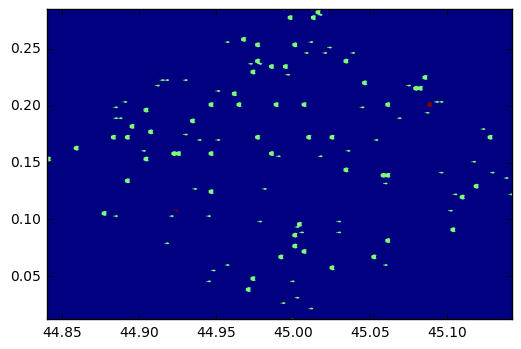

In [54]:
plt.hexbin(df.ra, df.dec)

In [80]:
df = pd.read_hdf('simTiles_0.hdf')

ValueError: key must be provided when HDF file contains multiple datasets.